# Import Python modules
First, we need to import the modules that we will need to acomplish this project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Load the Data

This project got two data files, `Observations.csv` and `Species_info.csv`. Both need to be read in as DataFrames.

Then, we print the first 5 rows of each dataframe to see what feature do each DataFrame has and the info they got.

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

Also is important to check the type of each feature on the DataFrames, we use **info()** to check data types and also to look for any null value on the DataFrame.

In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


# Explore the Data

First, it will be important to see min, max, mean values for each value, for that we use **describe()**
For species we found out that there are 7 unique values for category, some scientific names are repited and same for common names.For conversation status, there are 4 different status with Species of Concern as the top freq one.

In [6]:
species.describe()

category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161

We look for the unique values at the conservation status column. We knowed that the column has **nan** values so we confirm it here.

In [7]:
print(species['conservation_status'].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


It will be important to also look for the unique values at the category column

In [8]:
print(species['category'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Lets look for the number of each value on both columns, category and conservation status.

In [9]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

At ploting the number of each values we noted that there are only 191 values so there should be 5633 nan at that columns. Let's confirm it.

In [10]:
print(species.groupby('conservation_status').size())
print(f'na number of values: {species.conservation_status.isna().sum()}')

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na number of values: 5633


### Observations 

For the observations dataset, first it is important to check the number of parks at the dataset.

In [11]:
print('Number of parks:', observations['park_name'].nunique())
print('Park names:', observations['park_name'].unique())

Number of parks: 4
Park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We look for more detailed info of the observations (mix, max, mean, etc)

In [12]:
observations.describe()

observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

 That was not very valuable information, since it is not known which species each number obtained is for, so we proceed to search for the total number of observations.

In [13]:
print('Numer of observations:', observations['observations'].sum())

Numer of observations: 3314739


## Analysis
For doing a correct analysis, first we need to clean the data  `conservation_status` column in  `species`.
Lets sustitute  `nan` for  `No Intervention`.



In [14]:
species.fillna('No Intervention', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


It is important to understand the distribution of the category of those animals with their conservation status. We can eliminate the `No Intervention ` since it doesn't gave us important information.

In [15]:
conservationCategory = species.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservationCategory = conservationCategory.drop(index = 'No Intervention')
conservationCategory

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0

To undestand better the distribution, a graph is made to visualize the numbers between  `conservation_status` and  `species`. Different types of graph were tried but the better one was the bar plot.

Text(0, 0.5, 'Number of species')

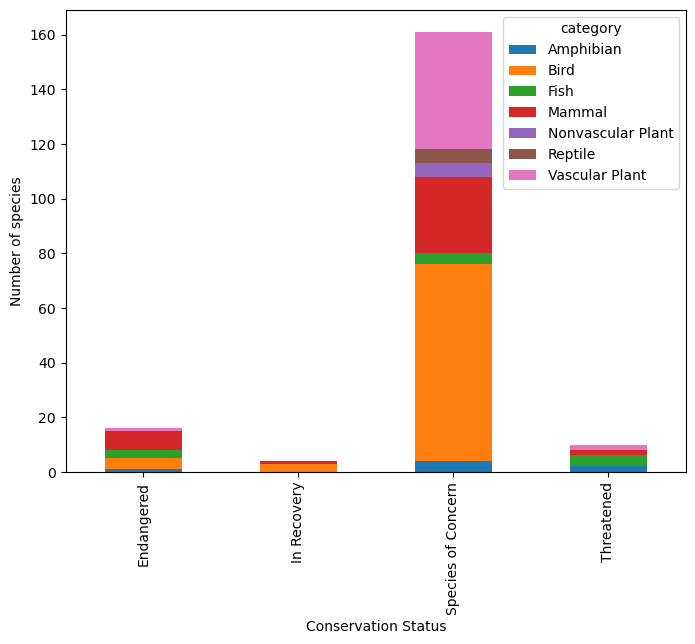

In [16]:
graph = conservationCategory.plot(kind = 'bar' , figsize=(8,6),stacked=True)
graph.set_xlabel('Conservation Status')
graph.set_ylabel('Number of species')

Let separate number of each category of animals by if they are protected or non protected. For that we create a column with True and False called `is protected`.

In [17]:
species['is_protected'] = species.conservation_status != 'No Intervention'

We separate them with a **groupby()**. And proceed to calculate percentage of each of them.

In [18]:
protected_counts = (species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index().pivot_table(index='category', columns='is_protected', values='scientific_name', fill_value=0).reset_index())
protected_counts.columns = ['category', 'not_protected', 'protected']
protected_counts['percentage_protected'] = protected_counts['protected']/(protected_counts['protected']+protected_counts['not_protected'])*100

protected_counts


category  not_protected  protected  percentage_protected
0          Amphibian             72          7              8.860759
1               Bird            413         75             15.368852
2               Fish            115         11              8.730159
3             Mammal            146         30             17.045455
4  Nonvascular Plant            328          5              1.501502
5            Reptile             73          5              6.410256
6     Vascular Plant           4216         46              1.079305

The category with the most species protected are **Mammal**, **Bird** and **Vascular Plant**. We will need to look for any.

Since we have some string values on our dataset, it will be not convenient to try to make a correlation matrix. So we have another method we can use to analyse if they had relationship on each and it will be the chi-squared test.

We check the relationship between **Mammal** and **Bird** and we get a p-value of **0.6879**, since the standard p-value singnificance is **0.05**, the one we get is higher than the threshold so doesnt seem to be any significant relationship between them.

In [1]:
from scipy.stats import chi2_contingency

relation_m_b = [[30,146], [75,413]]
chi2_contingency(relation_m_b)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

We tried some combinations and we found out that p-value was below the thresold for the case of **Amphibian** and **Nonvascular Plant**.

In [2]:
relation_a_n = [[7,72], [5,328]]
chi2_contingency(relation_a_n)

Chi2ContingencyResult(statistic=9.765103711306242, pvalue=0.001778554820715609, dof=1, expected_freq=array([[  2.30097087,  76.69902913],
       [  9.69902913, 323.30097087]]))

**Mammals** and **Repitles** also have a statistically significant difference.

In [3]:
relation_m_r = [[30,146], [5,73]]
chi2_contingency(relation_m_r)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

Since mammals are the category with the highest percentage for protected, lets check the common_names that mammal represent. We use **unique()** to avoid having repeated values.

In [21]:
mammal_common_names = species[species['category'] == 'Mammal']['common_names']
mammal_common_names_unique = mammal_common_names.unique()
mammal_common_names_unique

array(["Gapper's Red-Backed Vole", 'American Bison, Bison',
       'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle',
       'Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)',
       'Wapiti Or Elk', 'White-Tailed Deer', 'Feral Hog, Wild Pig',
       'Coyote', 'Gray Wolf', 'Red Wolf', 'Common Gray Fox, Gray Fox',
       'Black Fox, Cross Fox, Red Fox, Silver Fox', 'Red Fox',
       'Mountain Lion', 'Wild Cat, Wildcat', 'Bobcat',
       'Panther (Mountain Lion)', 'Striped Skunk',
       'Eastern Spotted Skunk', 'River Otter', 'Northern River Otter',
       'Fisher', 'Mink (Or Weasel)', 'Long-Tailed Weasel', 'Least Weasel',
       'Mink', 'Common Raccoon, Raccoon', 'Black Bear',
       "Rafinesque's Big-Eared Bat", 'Big Brown Bat', 'Silver-Haired Bat',
       'Eastern Red Bat, Red Bat', 'Hoary Bat',
       'Mississippi Myotis, Southeastern Myotis', 'Gray Myotis',
       "Keen's Myotis",
       'Eastern Small-Footed Bat, Eastern Small-Footed Myotis',
       'Little Brown 

Let's put all the names together in a list and then look for the most common word. To make this easier, lets import `Counter`. We need to replace the **,** for spaces to remove the comas, also we need to eliminate duplicated words on a same cell, for that we made a method called `called_names`.

In [22]:
from collections import Counter

def process_names(names):
    word_counts = Counter()
    for name in names:
        clean_name = name.replace(',', '')
        words = clean_name.split()
        unique_words = set(words)
        word_counts.update(unique_words)
    
    return word_counts

We call the method with **mammal_common_names_unique** as the parameter and then we get that **bat** is the most common word of the list.

In [23]:
word_counts = process_names(mammal_common_names_unique)

# Convertir el resultado a un DataFrame para visualizar mejor
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

print(word_counts_df)

             Word  Count
56            Bat     23
114         Shrew     18
61         Myotis     17
93          Mouse     16
4        American     12
..            ...    ...
95          Marsh      1
92         Golden      1
91      Allegheny      1
84            Man      1
208  Broad-Footed      1

[209 rows x 2 columns]


Let's make a new column at the species dataframe to see which lines does contain Bat.

In [24]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   
5                                  White-Tailed Deer     No Intervention   
6                                Feral Hog, Wild Pig     No Intervention   
7                                             Coyote  Species of Concern   
8                                          Gray Wolf          Endangered   
9                                           Red Wolf          Endangered   

   is_protected  is_bat  
0         False   False  
1         False   False  
2         False   False  
3         False   False  
4         False   False  
5         False   False  
6         False   False  
7          True   False  
8          True   False  
9          True   False

By filtering the data were warbler is **True**, it is observed that the protected status ir quite variable, a mix of protected and non protected.

In [25]:
species[species.is_bat]

category            scientific_name  \
28     Mammal   Corynorhinus rafinesquii   
29     Mammal           Eptesicus fuscus   
30     Mammal  Lasionycteris noctivagans   
31     Mammal          Lasiurus borealis   
32     Mammal          Lasiurus cinereus   
36     Mammal              Myotis leibii   
37     Mammal           Myotis lucifugus   
38     Mammal     Myotis septentrionalis   
39     Mammal             Myotis sodalis   
40     Mammal       Nycticeius humeralis   
3033   Mammal         Antrozous pallidus   
3034   Mammal    Corynorhinus townsendii   
3035   Mammal           Eptesicus fuscus   
3036   Mammal          Euderma maculatum   
3037   Mammal  Lasionycteris noctivagans   
3038   Mammal          Lasiurus cinereus   
3040   Mammal         Myotis ciliolabrum   
3042   Mammal           Myotis lucifugus   
4461   Mammal             Eumops perotis   
4462   Mammal      Tadarida brasiliensis   
4463   Mammal    Corynorhinus townsendii   
4464   Mammal      Lasiurus blossevillii   
4468   Mammal      Parastrellus hesperus   

                                           common_names conservation_status  \
28                           Rafinesque's Big-Eared Bat     No Intervention   
29                                        Big Brown Bat  Species of Concern   
30                                    Silver-Haired Bat  Species of Concern   
31                             Eastern Red Bat, Red Bat     No Intervention   
32                                            Hoary Bat     No Intervention   
36    Eastern Small-Footed Bat, Eastern Small-Footed...  Species of Concern   
37                Little Brown Bat, Little Brown Myotis  Species of Concern   
38             Northern Long-Eared Bat, Northern Myotis          Threatened   
39                Indiana Bat, Indiana Or Social Myotis          Endangered   
40                                          Evening Bat     No Intervention   
3033                             Pallid Bat, Pallid Bat  Species of Concern   
3034  Mule-Eared Bat, Pacific Townsend's Big-Eared B...     No Intervention   
3035                       Big Brown Bat, Big Brown Bat  Species of Concern   
3036                           Spotted Bat, Spotted Bat  Species of Concern   
3037               Silver-Haired Bat, Silver-Haired Bat  Species of Concern   
3038                               Hoary Bat, Hoary Bat     No Intervention   
3040  Small-Footed Myotis, Western Small-Footed Bat,...     No Intervention   
3042  Little Brown Bat, Little Brown Myotis, Little ...  Species of Concern   
4461                                Western Mastiff Bat     No Intervention   
4462                            Mexican Free-Tailed Bat     No Intervention   
4463                           Townsend's Big-Eared Bat     No Intervention   
4464                                    Western Red Bat  Species of Concern   
4468                                         Canyon Bat     No Intervention   

      is_protected  is_bat  
28           False    True  
29            True    True  
30            True    True  
31           False    True  
32           False    True  
36            True    True  
37            True    True  
38            True    True  
39            True    True  
40           False    True  
3033          True    True  
3034         False    True  
3035          True    True  
3036          True    True  
3037          True    True  
3038         False    True  
3040         False    True  
3042          True    True  
4461         False    True  
4462         False    True  
4463         False    True  
4464          True    True  
4468         False    True

So now we use the observations data. This data set lets us know the information about observations around the four national parks.

In [26]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

scientific_name                            park_name  \
0       Lasiurus blossevillii                  Bryce National Park   
1       Lasiurus blossevillii  Great Smoky Mountains National Park   
2       Lasiurus blossevillii               Yosemite National Park   
3       Lasiurus blossevillii            Yellowstone National Park   
4    Corynorhinus rafinesquii               Yosemite National Park   
..                        ...                                  ...   
139            Myotis sodalis            Yellowstone National Park   
140             Myotis leibii               Yosemite National Park   
141             Myotis leibii                  Bryce National Park   
142             Myotis leibii  Great Smoky Mountains National Park   
143             Myotis leibii            Yellowstone National Park   

     observations category                                       common_names  \
0             113   Mammal                                    Western Red Bat   
1              70   Mammal                                    Western Red Bat   
2             123   Mammal                                    Western Red Bat   
3             221   Mammal                                    Western Red Bat   
4             188   Mammal                         Rafinesque's Big-Eared Bat   
..            ...      ...                                                ...   
139            68   Mammal              Indiana Bat, Indiana Or Social Myotis   
140           132   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
141            84   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
142            49   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
143           233   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   

    conservation_status  is_protected  is_bat  
0    Species of Concern          True    True  
1    Species of Concern          True    True  
2    Species of Concern          True    True  
3    Species of Concern          True    True  
4       No Intervention         False    True  
..                  ...           ...     ...  
139          Endangered          True    True  
140  Species of Concern          True    True  
141  Species of Concern          True    True  
142  Species of Concern          True    True  
143  Species of Concern          True    True  

[144 rows x 8 columns]

We look for the distribution of observations for each national park, we have a total of **11,992**. The national park were there were more observations was in **Yellowstone National Park** and the one with less observations was **Great Smoky Mountains National Park**.

In [29]:
print(bat_observations.groupby('park_name')['observations'].sum())

park_name
Bryce National Park                    3433
Great Smoky Mountains National Park    2411
Yellowstone National Park              8362
Yosemite National Park                 4786
Name: observations, dtype: int64


Also, the last numbers were splitted in protected and not protected to see the behavior of this feature. 

In [30]:
observations_by_park_and_protected = bat_observations.groupby(['park_name', 'is_protected'])['observations'].sum().reset_index()
observations_by_park_and_protected

park_name  is_protected  observations
0                  Bryce National Park         False          1596
1                  Bryce National Park          True          1837
2  Great Smoky Mountains National Park         False          1299
3  Great Smoky Mountains National Park          True          1112
4            Yellowstone National Park         False          4044
5            Yellowstone National Park          True          4318
6               Yosemite National Park         False          2345
7               Yosemite National Park          True          2441

As we saw in the data above, in some parks the number of protected bats is greater than the number of unprotected bats, and in others, it is the other way around. In order to better analyze this, a graph is made where we can see that in **Bryce**, **Yellowstone**, and **Yosemite**, the number of bats observed was mostly protected.

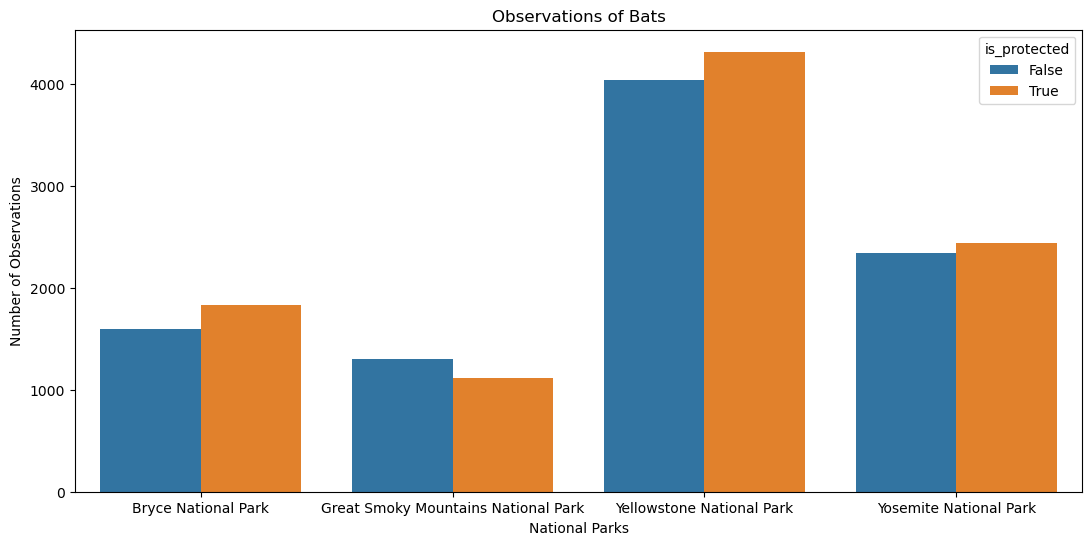

In [33]:
plt.figure(figsize=(13, 6))
sns.barplot(x=observations_by_park_and_protected.park_name, y= observations_by_park_and_protected.observations, hue=observations_by_park_and_protected.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats')
plt.show()

# Conclusions

After having analyzed the data, it is concluded that:
1. There are several types of conservation status of protected species, where the one with the largest number is Species of concern.
1. The highest percentage of protected species occurs in mammals. The largest number of protected species is for Birds but they also have a large number of non-protected species.
1. Amphibian and Nonvascular Plan were found to have a statistically significant difference between them, as were Mammals and Reptiles. The same does not happen between Mammals and Birds, it was shown that these two variables do not have a significant statistical difference between them.
1. It was found that the most common mammal within the species data is the bat, we proceeded to filter the data by bats and by their observations in the different parks and managed to find the result that in 3 of 4 parks, the individuals observed  were more protected species than non-protected species. So Great Smoky mountains National Park is the one that should work a little more on its bat conservation.